#### 📊 train_fc.ipynb

### Libraries and environment

In [3]:
model_name = "torch_2048_6"

In [1]:
# CIFAR10-Torch-Classifier and config.py
from cifar10_classifier import CIFAR10Classifier
import config

# libraries
import torch
from torchvision import transforms

In [4]:
# visualization
from utils import show_random_samples, show_class_distribution, plot_training_history

In [3]:
# seed and deterministic
from utils import set_seed, set_deterministic
set_seed(config.SEED)
set_deterministic(
    deterministic=config.DETERMINISTIC,
    benchmark=config.BENCHMARK
)

🧬 Setting seed: 42


### Data loading and train/test set preparation

In [5]:
# data loading
from utils import (
    compute_mean_std, get_transforms,
    load_cifar10_datasets, split_train_val, create_loaders,
    get_dataset_info
)

# Normalization
raw_dataset, _ = load_cifar10_datasets(transform=transforms.ToTensor(), subset="train")
# extract class names
class_names = raw_dataset.classes
# compute mean and std  
mean, std = compute_mean_std(raw_dataset)

# Apply transformations
full_transform = get_transforms(mean, std)

# Load with transformations
train_dataset, _ = load_cifar10_datasets(transform=full_transform, subset="train")

# Split
train_subset, val_subset = split_train_val(train_dataset, split_ratio=config.SPLIT_RATIO)

# Loaders
train_loader, val_loader, _ = create_loaders(train_subset=train_subset, val_subset=val_subset, test_dataset=None, batch_size=config.BATCH_SIZE)


📥 Downloading/loading CIFAR-10 datasets... Loading train dataset
Files already downloaded and verified
✅ Loaded training samples: 50000
📊 Computing mean and std...
✅ Mean: [0.4913996756076813, 0.48215851187705994, 0.4465310275554657], Std: [0.24703219532966614, 0.24348489940166473, 0.2615877091884613]
🧪 Creating normalization transform...
📥 Downloading/loading CIFAR-10 datasets... Loading train dataset
Files already downloaded and verified
✅ Loaded training samples: 50000
🔀 Splitting dataset with ratio 0.80...
✅ Train size: 40000, Validation size: 10000
📦 Creating data loaders with batch size 256...
✅ Data loaders ready.


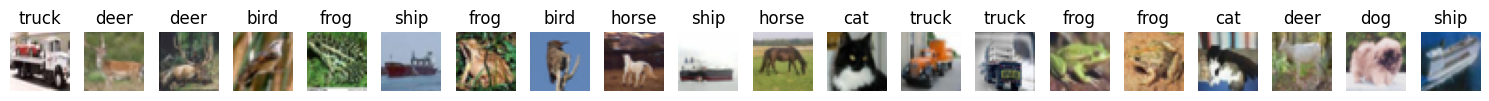

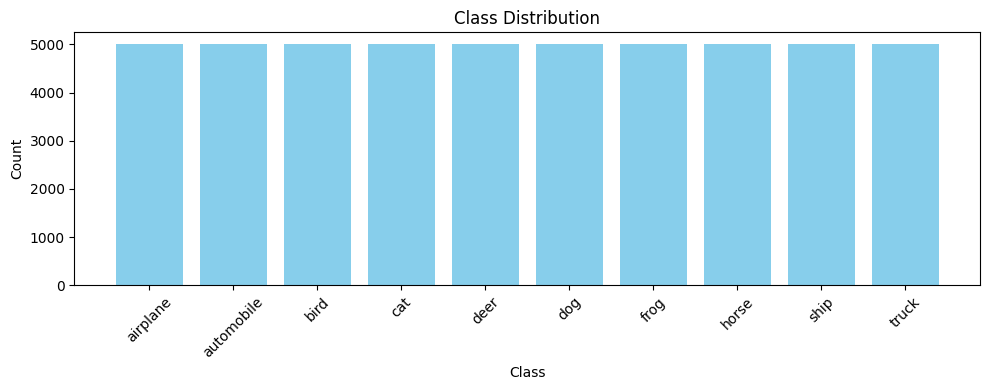

In [6]:
# show random samples and class distribution
show_random_samples(train_dataset, class_names, n=20)
show_class_distribution(train_dataset, class_names)

### Model

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_shape, num_classes = get_dataset_info(train_dataset)

model_cls = CIFAR10Classifier(
    name=model_name,
    input_shape=input_shape,
    num_classes=num_classes,
    hidden_layers=[2048,1024,512,256,128,64],
    dropout_rates=[0.3,0.3,0.3,0.3,0.3,0.3],
    activation_fn_name="ReLU",
    device=device,
    mean=mean.tolist(),
    std=std.tolist()
    )
model_cls.build_model()
model_cls.compile()
model_cls.summary()

🔍 Extracting dataset info...
✅ Input shape: torch.Size([3, 32, 32]), Number of classes: 10


Layer (type:depth-idx)                   Output Shape              Param #
CIFAR10_torch                            [1, 10]                   --
├─Flatten: 1-1                           [1, 3072]                 --
├─Sequential: 1-2                        [1, 64]                   --
│    └─Linear: 2-1                       [1, 2048]                 6,293,504
│    └─BatchNorm1d: 2-2                  [1, 2048]                 4,096
│    └─ReLU: 2-3                         [1, 2048]                 --
│    └─Dropout: 2-4                      [1, 2048]                 --
│    └─Linear: 2-5                       [1, 1024]                 2,098,176
│    └─BatchNorm1d: 2-6                  [1, 1024]                 2,048
│    └─ReLU: 2-7                         [1, 1024]                 --
│    └─Dropout: 2-8                      [1, 1024]                 --
│    └─Linear: 2-9                       [1, 512]                  524,800
│    └─BatchNorm1d: 2-10                 [1, 512]           

### Training

In [8]:
model_cls.train(
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=100,
    verbose=True,
    log_tensorboard=True
)


🚀 Training configuration:
📦 Model name:        torch_2048_6
📐 Input shape:       torch.Size([3, 32, 32])
🔢 Hidden layers:     [2048, 1024, 512, 256, 128, 64]
🎛 Dropout rates:     [0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
⚙️ Activation:        ReLU
📈 Optimizer:         Adam {'lr': 0.01}
🎯 Criterion:         CrossEntropyLoss {}
🧠 Device:            cuda
📊 Epochs:            100
🪄 Early stopping:    True (patience=10)

[1/100] Train loss: 1.9089, acc: 0.3060 | Val loss: 1.7083, acc: 0.3870 | 🕒 21.86s
[2/100] Train loss: 1.6890, acc: 0.3927 | Val loss: 1.5997, acc: 0.4333 | 🕒 24.11s
[3/100] Train loss: 1.5896, acc: 0.4330 | Val loss: 1.5118, acc: 0.4588 | 🕒 24.11s
[4/100] Train loss: 1.5176, acc: 0.4636 | Val loss: 1.4815, acc: 0.4787 | 🕒 24.36s
[5/100] Train loss: 1.4610, acc: 0.4854 | Val loss: 1.4462, acc: 0.4922 | 🕒 22.94s
[6/100] Train loss: 1.4113, acc: 0.5011 | Val loss: 1.3912, acc: 0.5008 | 🕒 23.08s
[7/100] Train loss: 1.3703, acc: 0.5174 | Val loss: 1.4076, acc: 0.5053 | 🕒 22.77s
[8/100] T